In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
data = {
    "Temp": [10, 25, 15, 12, 18, 20, 24],
    "Wind": [0, 0, 7, 5, 7, 10, 6],
    "Marry": ["Dingin", "Panas", "Dingin", "Dingin", "Panas", "Dingin", "Panas"]
}

df = pd.DataFrame(data)
df


,Temp,Wind,Marry
0,10,0,Dingin
1,25,0,Panas
2,15,7,Dingin
3,12,5,Dingin
4,18,7,Panas
5,20,10,Dingin
6,24,6,Panas


In [3]:
print(df.info())
print("\nNilai unik tiap kolom:")
for col in df.columns:
    print(col, df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Temp    7 non-null      int64 
 1   Wind    7 non-null      int64 
 2   Marry   7 non-null      object
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes
None

Nilai unik tiap kolom:
Temp [10 25 15 12 18 20 24]
Wind [ 0  7  5 10  6]
Marry ['Dingin' 'Panas']


In [4]:
le = LabelEncoder()
df['Marry'] = le.fit_transform(df['Marry'])
# Dingin=0, Panas=1
df


,Temp,Wind,Marry
0,10,0,0
1,25,0,1
2,15,7,0
3,12,5,0
4,18,7,1
5,20,10,0
6,24,6,1


/tmp/ipython-input-2560677630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Marry'], palette="viridis")


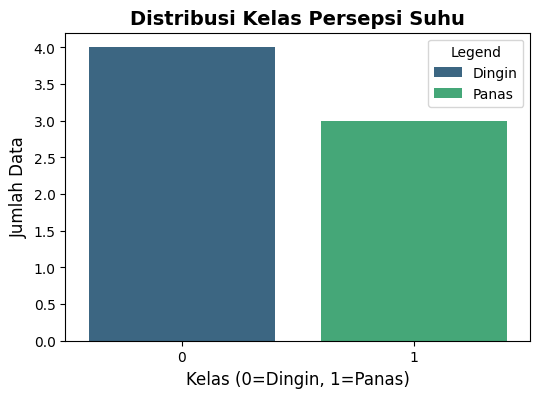

In [5]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['Marry'], palette="viridis")

plt.title("Distribusi Kelas Persepsi Suhu", fontsize=14, weight='bold')
plt.xlabel("Kelas (0=Dingin, 1=Panas)", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)

ax.legend(["Dingin", "Panas"], title="Legend")
plt.show()


In [6]:
X = df[['Temp', 'Wind']]
y = df['Marry']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [7]:
param_grid = {
    'n_neighbors': list(range(1, 3)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2)
grid.fit(X_train, y_train)

print("Parameter terbaik:", grid.best_params_)
best_knn = grid.best_estimator_

Parameter terbaik: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [11]:
y_pred = best_knn.predict(X_test)

print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



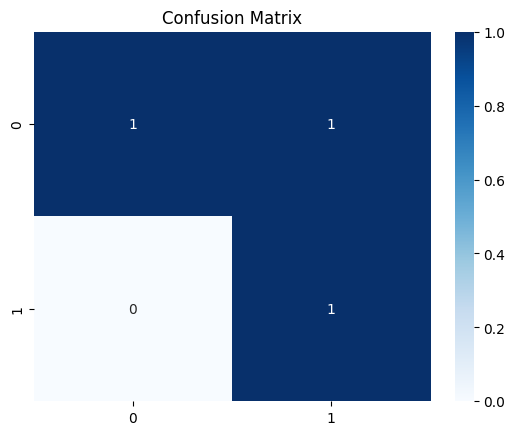

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [9]:
data_baru = pd.DataFrame({"Temp":[16], "Wind":[3]})
data_baru_scaled = scaler.transform(data_baru)

prediksi = best_knn.predict(data_baru_scaled)
hasil = le.inverse_transform(prediksi)[0]

print("Persepsi Marry untuk Temp=16°C, Wind=3 km/jam adalah:", hasil)


Persepsi Marry untuk Temp=16°C, Wind=3 km/jam adalah: Dingin


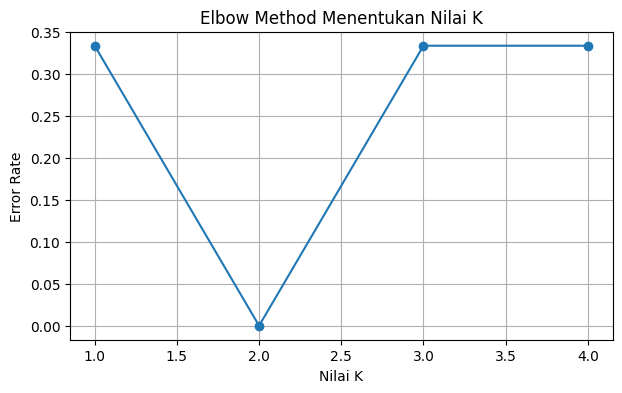

In [10]:
error_rates = []

for k in range(1, 5): # Modified range from 1,10 to 1,5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(7,4))
plt.plot(range(1,5), error_rates, marker='o') # Modified range
plt.title("Elbow Method Menentukan Nilai K")
plt.xlabel("Nilai K")
plt.ylabel("Error Rate")
plt.grid()
plt.show()